# CLASSIFICATION TASK

✅ Steps to Follow:

1️⃣ Data Cleaning:
- Check nulls, clean data, remove irrelevant columns.

2️⃣ Data Visualization:
- Check distributions, class balance, and feature relationships.

3️⃣ Data Preparation:
- Split data into features and target.
- Train-test split (e.g., 80%-20%).
- Apply scaling if needed (KNN, SVM).

4️⃣ Modeling:
- Logistic Regression → For binary, multi-class, or ordinal.
- KNN → Choose K, distance-based, needs scaling.
- SVM → Choose needs scaling.

5️⃣ Evaluation:
- Use accuracy, confusion matrix, and classification report.
- Check for overfitting or underfitting.

6️⃣ Tuning:
- Handle imbalance if needed.

🚀 Goal: Build, evaluate, and compare classification models.

=====================================================================


# **Data Preprocessing**


In [640]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [641]:
data = pd.read_csv('Telco customer.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [642]:
data.shape

(7043, 21)

In [643]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [644]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [645]:
data.isnull().sum() * 100 / len(data)

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [646]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [647]:
data.drop('customerID', axis=1, inplace=True)

In [648]:
data['MultipleLines'] = data['MultipleLines'].map({"Yes": 1, "No": 0, "No phone service": 0})

In [649]:
data['gender'] = data['gender'].map({"Male": 1, "Female": 0})

In [650]:
yes_no_columns = [
    "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"
]
for col in yes_no_columns:
    data[col] = data[col].map({"Yes": 1, "No": 0})

In [651]:
service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in service_cols:
    data[col] = data[col].map({
        "Yes": 1,
        "No": 0,
        "No internet service": 0
    })

In [652]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)

In [653]:
multi_class_cols = ['InternetService', 'Contract', 'PaymentMethod']
data = pd.get_dummies(data, columns=multi_class_cols, drop_first=True)

In [654]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,False,False,True,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,True,False,True,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,True,False,False,False,False,False,True


In [655]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


# **Data visualization**

In [656]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

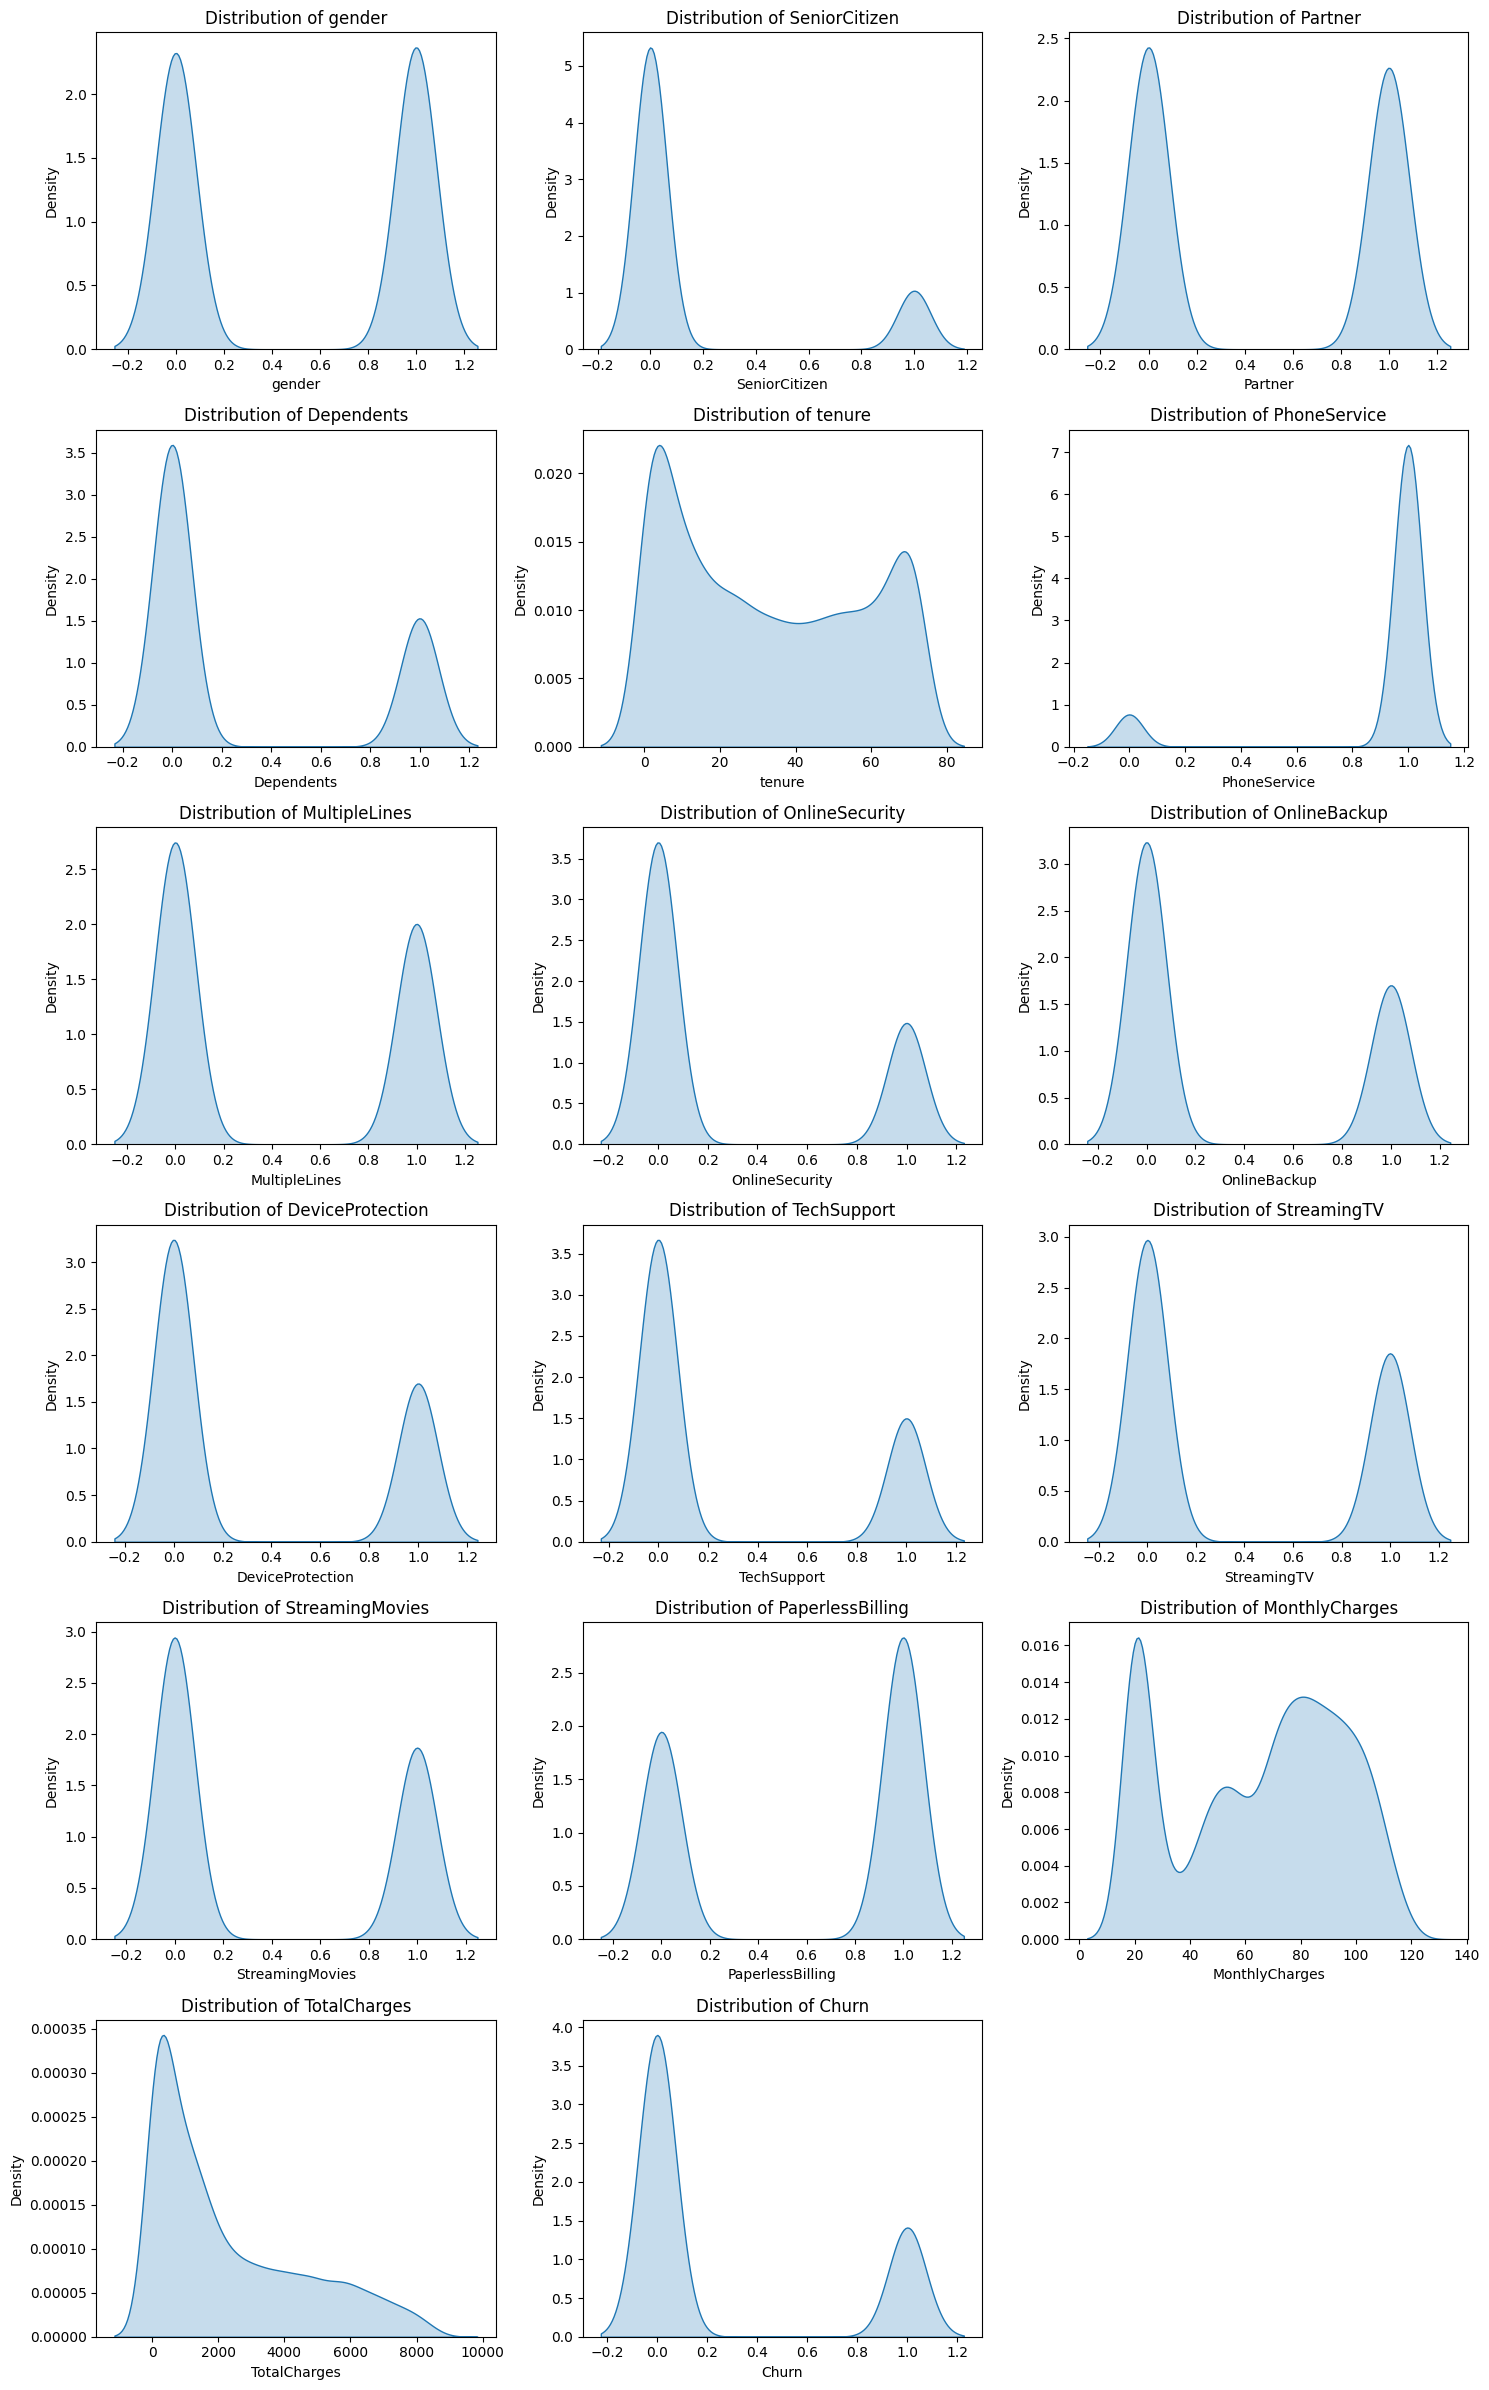

In [657]:
import math

n_features = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data[col], fill=True)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [658]:
data.duplicated().sum()

np.int64(22)

In [659]:
data.drop_duplicates(inplace=True)

In [660]:
data.duplicated().sum()

np.int64(0)

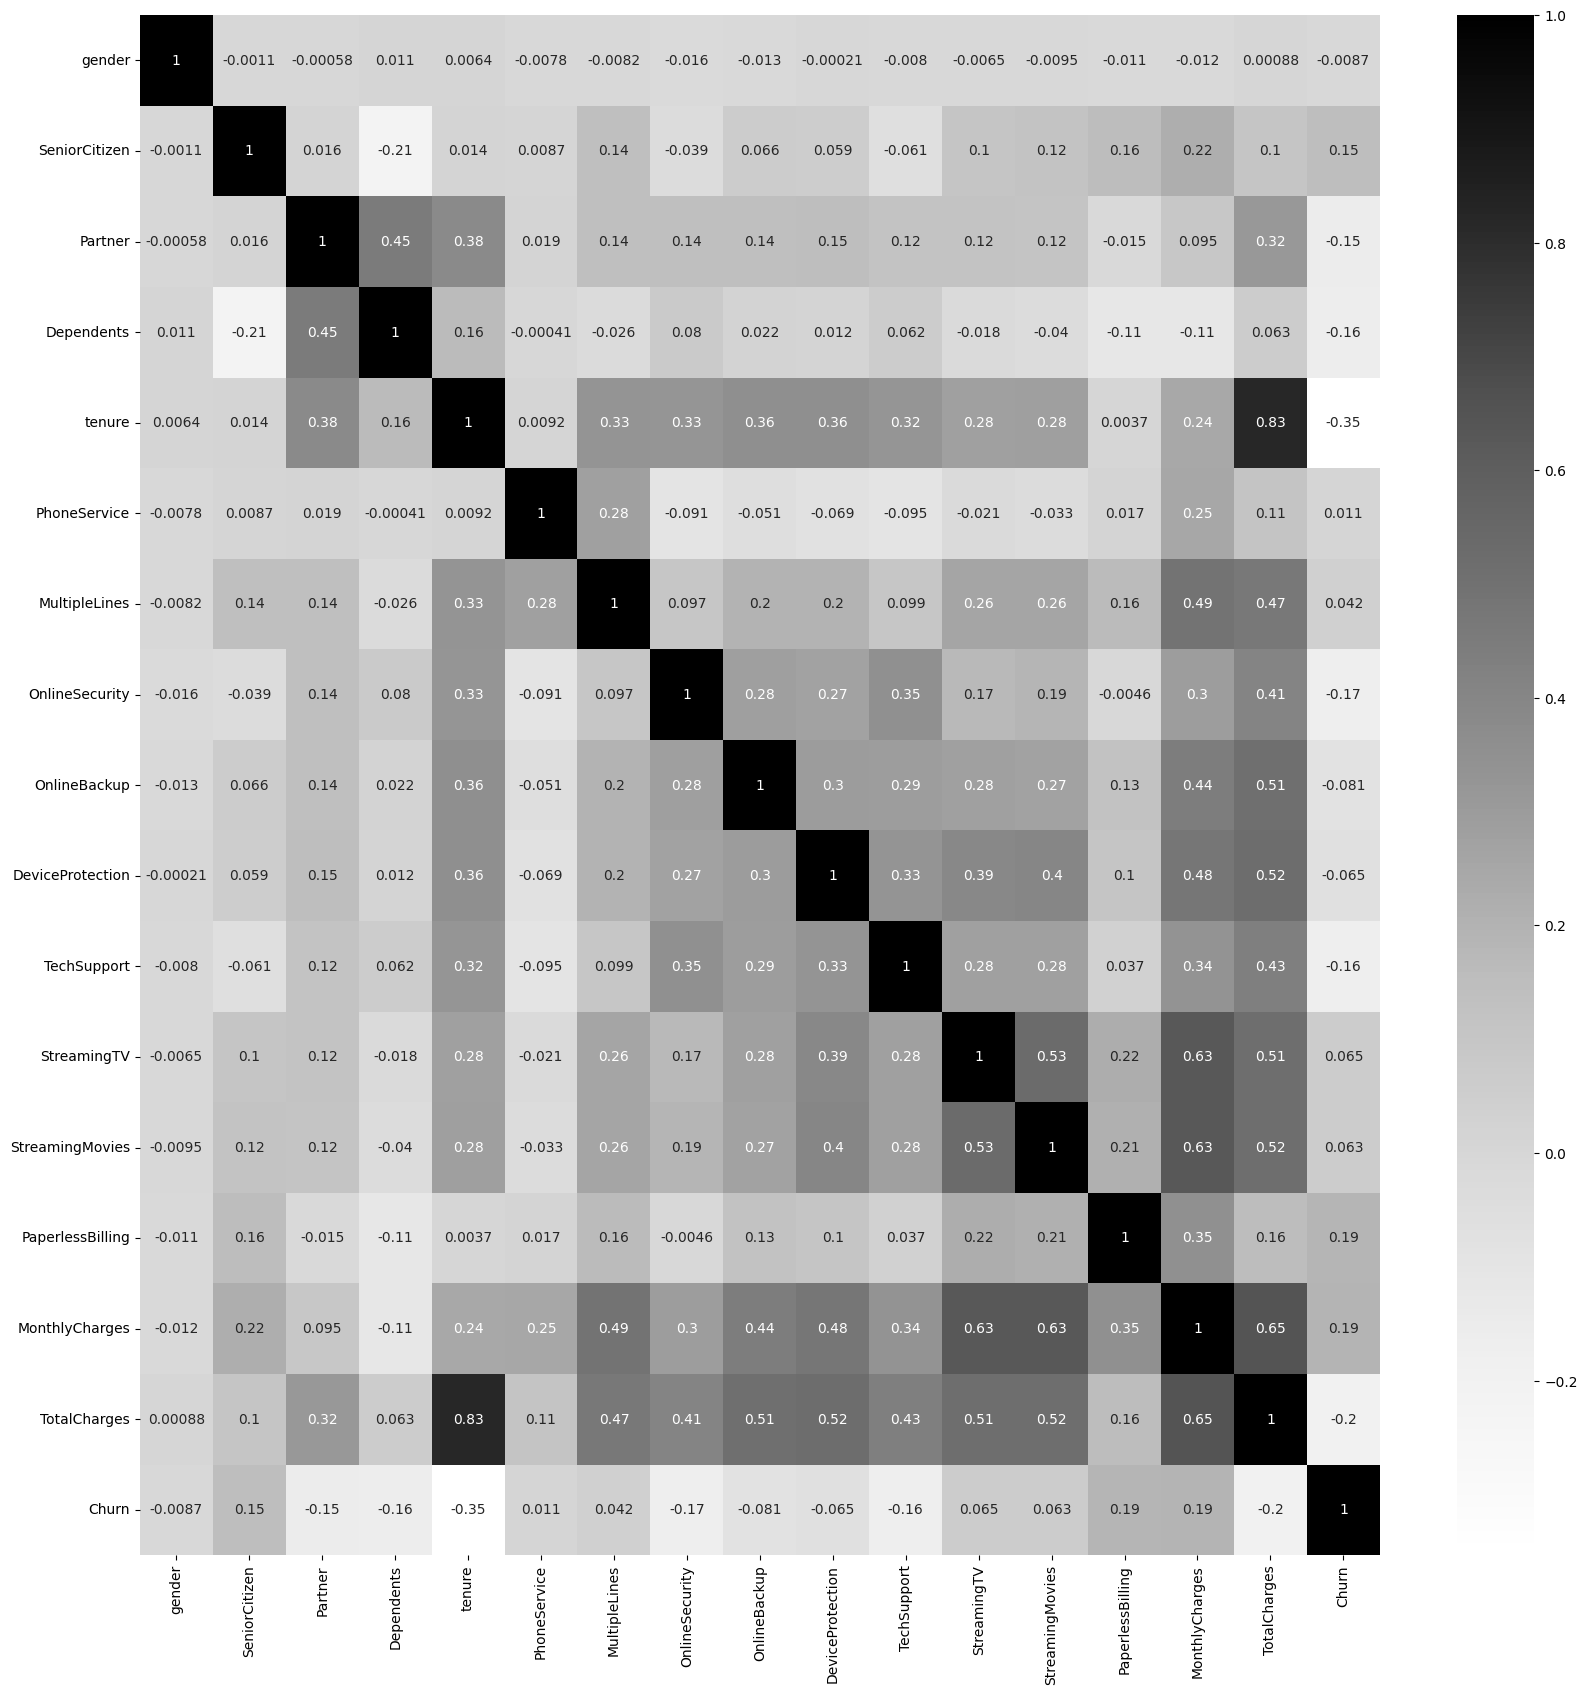

In [661]:
plt.figure(figsize=(20,20))
sns.heatmap(data[numeric_cols].corr(),annot = True,cmap = 'Greys')
plt.show()

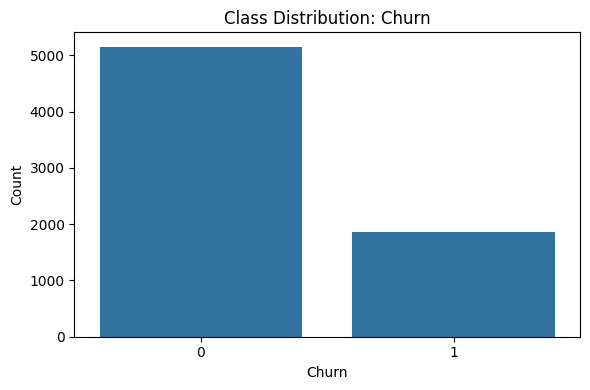

In [662]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Class Distribution: Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# **Feature Engineering**

In [663]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [664]:
categorical_columns

Index([], dtype='object')

In [665]:
numerical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [666]:
x = data.drop('Churn', axis=1)
y = data['Churn']

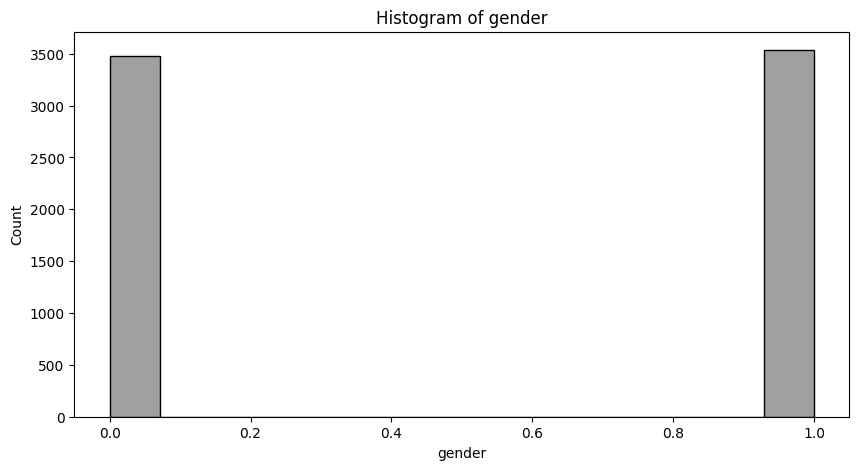

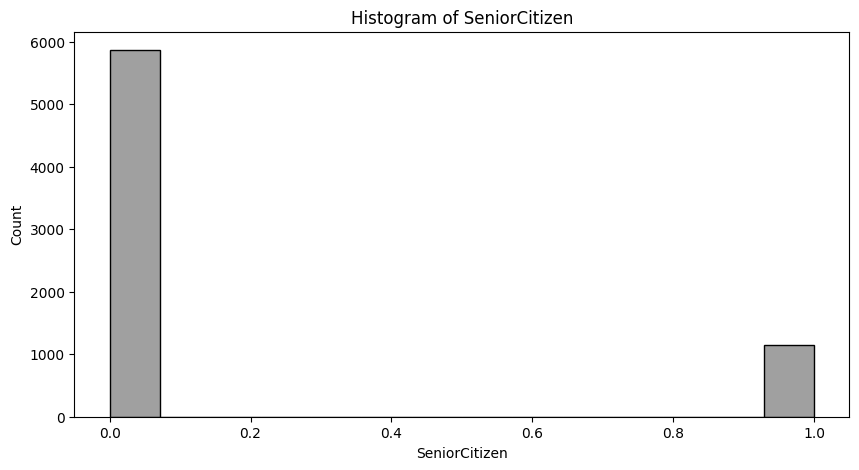

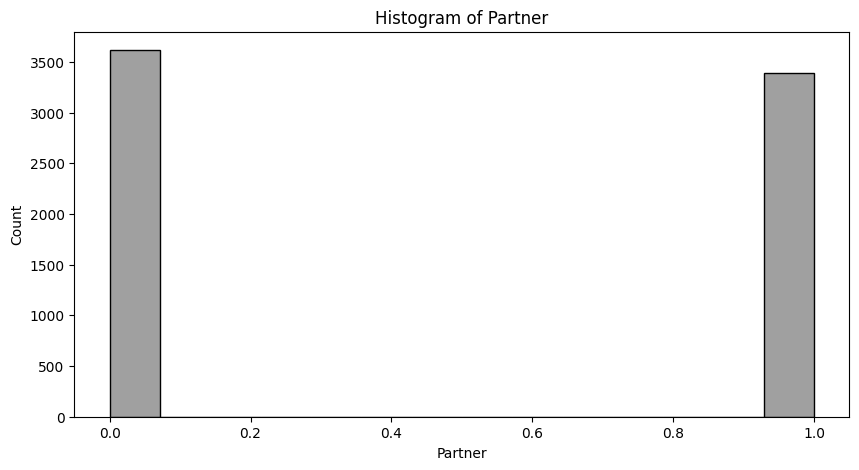

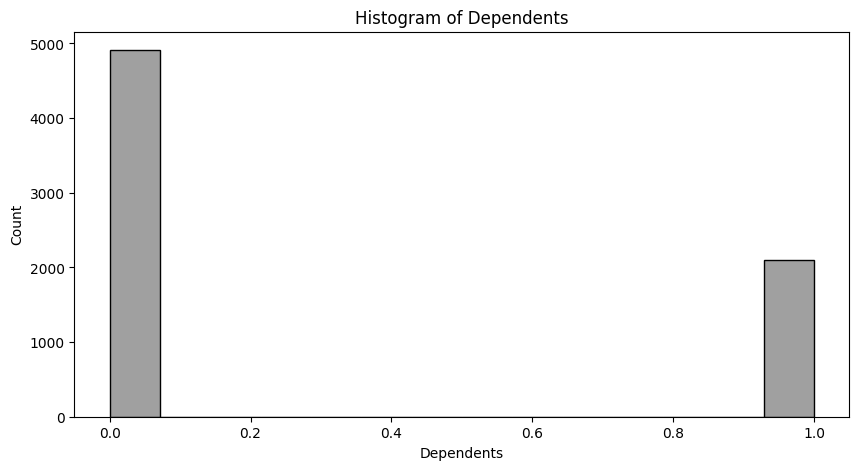

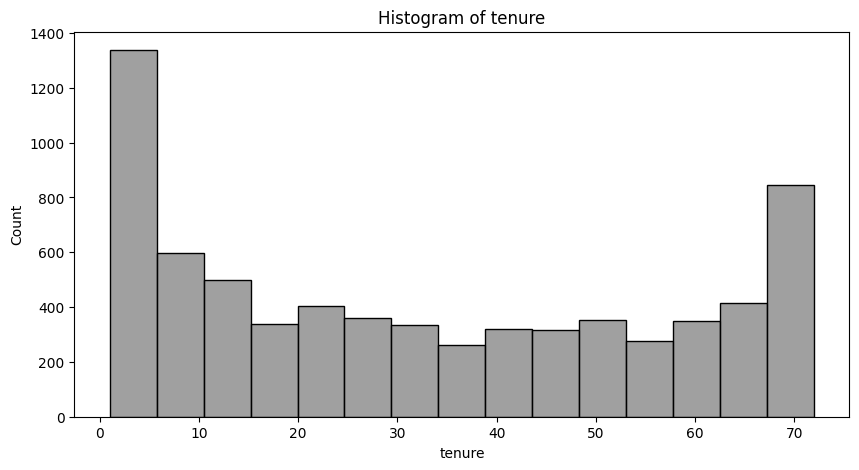

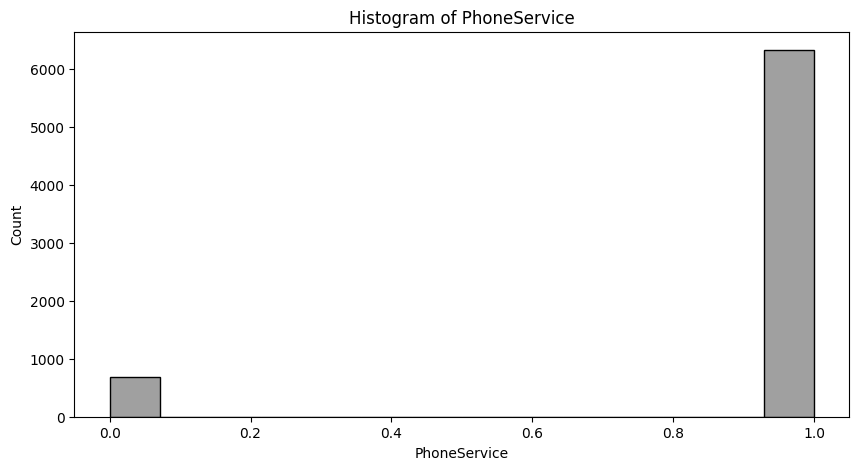

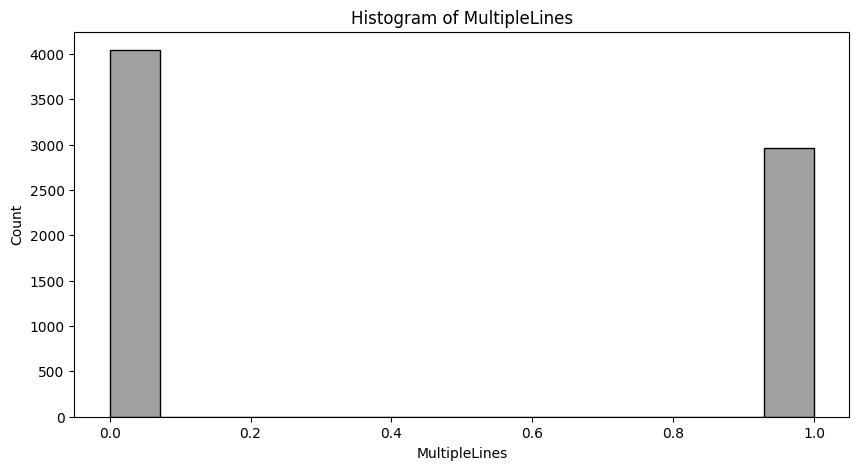

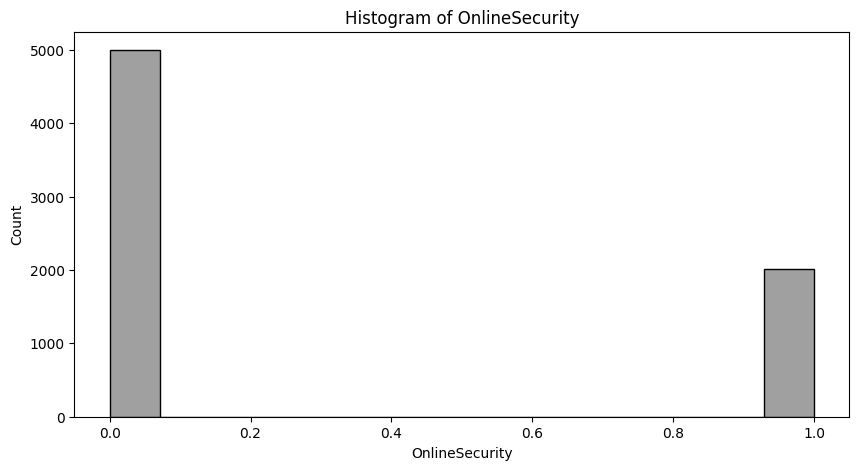

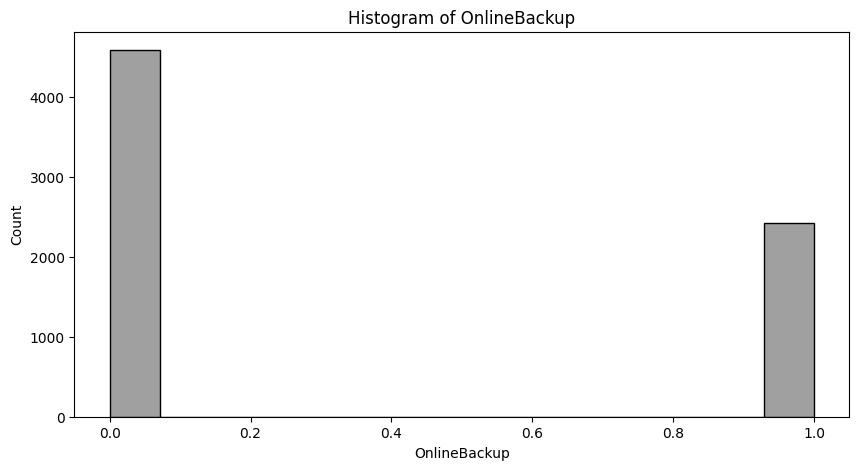

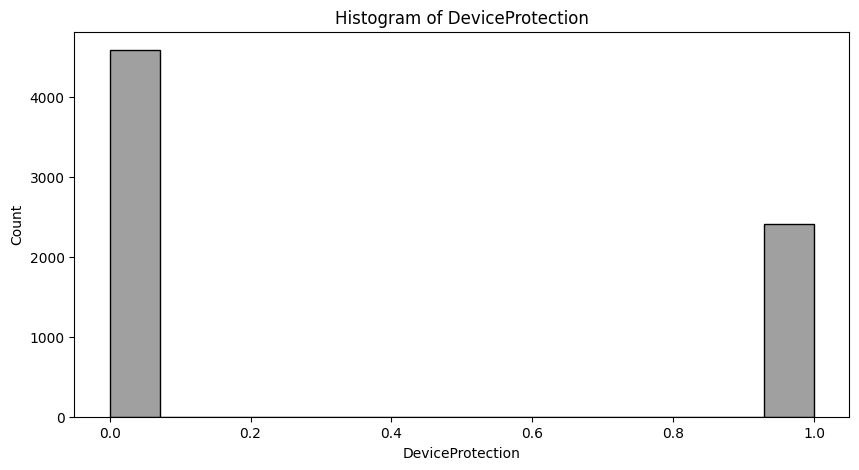

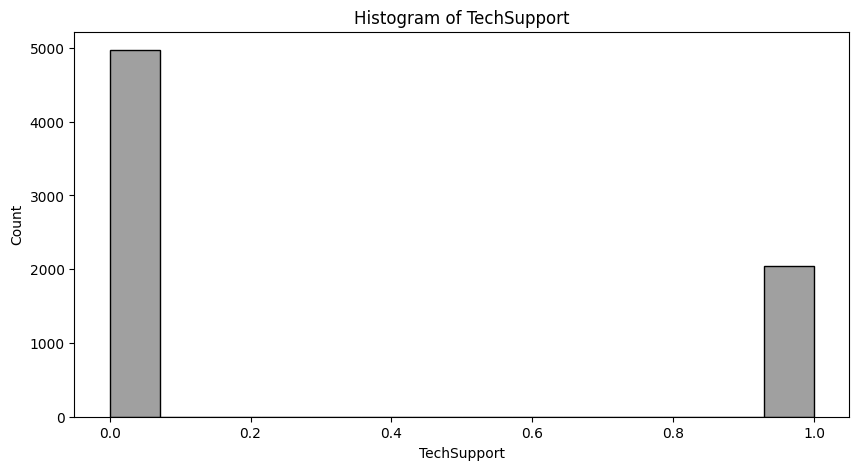

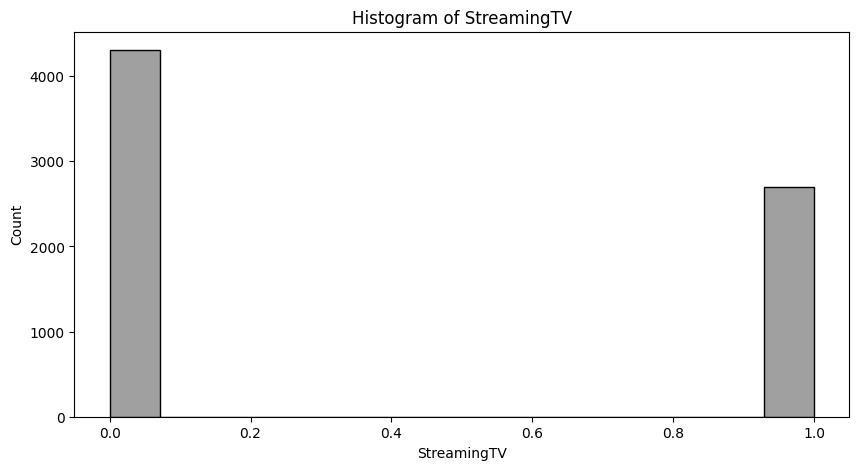

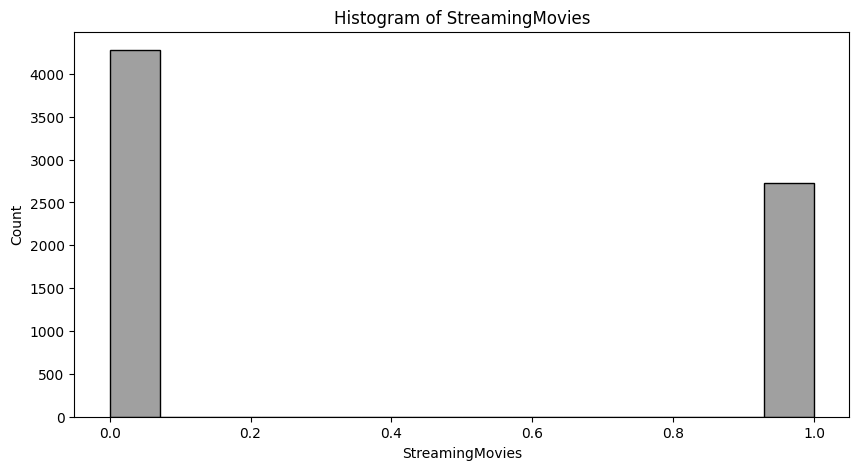

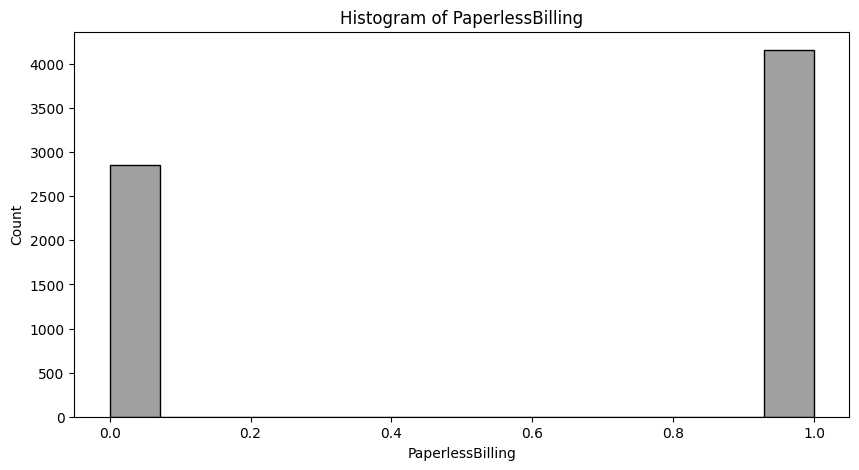

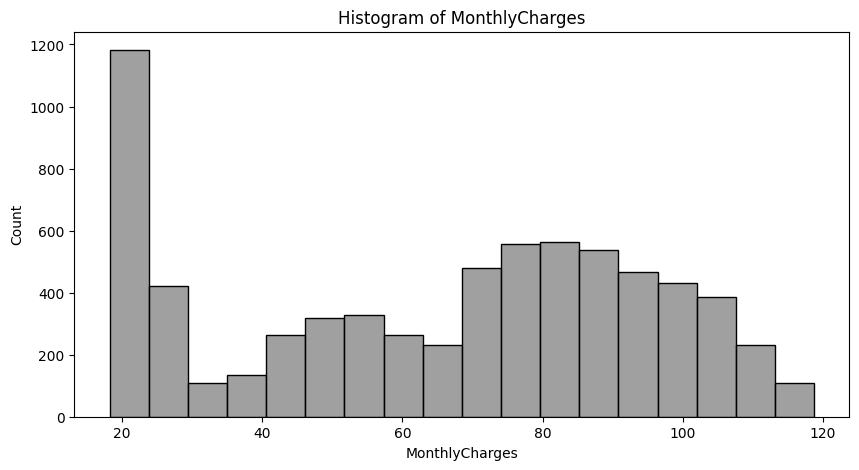

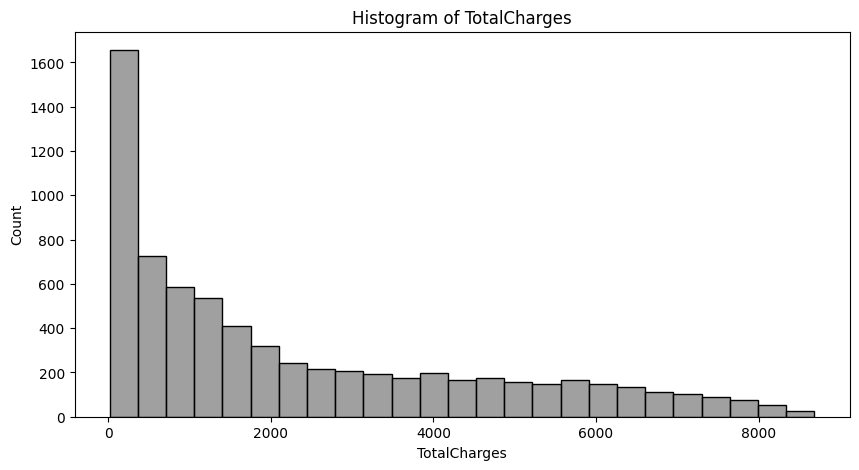

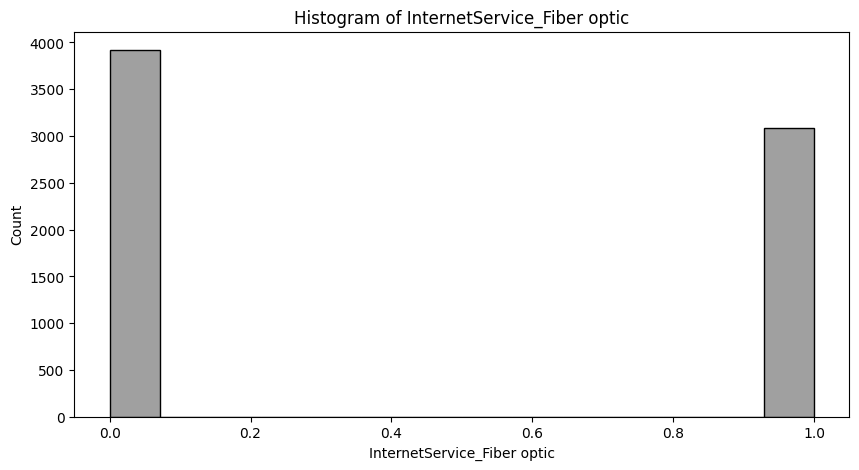

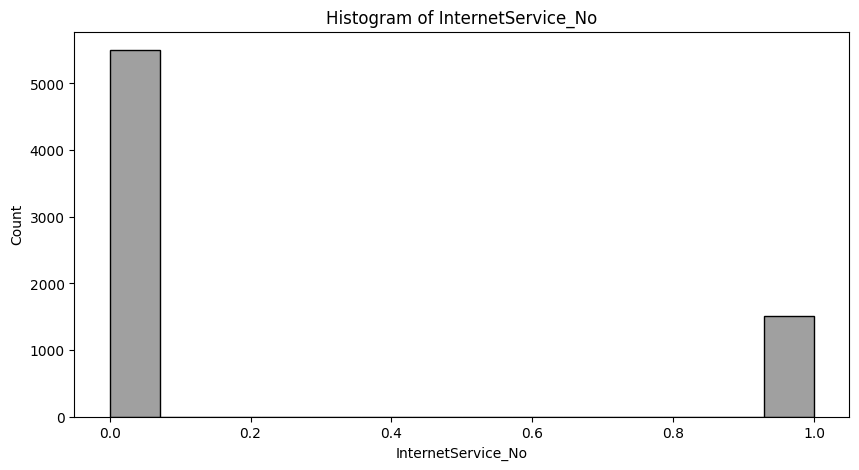

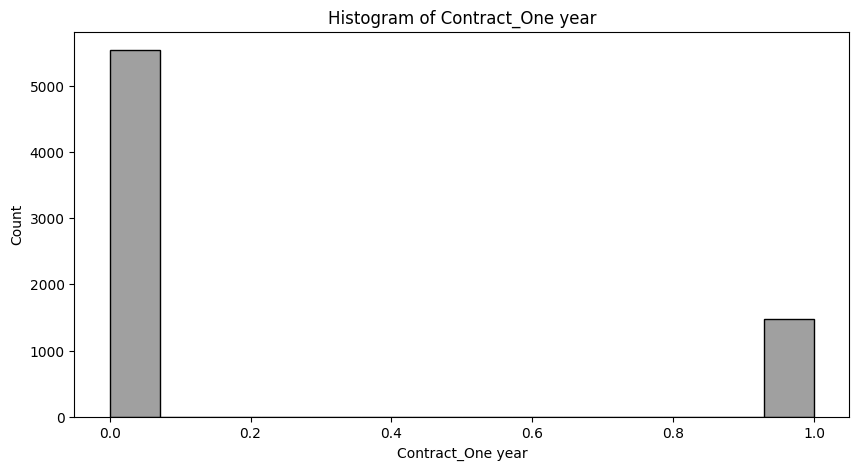

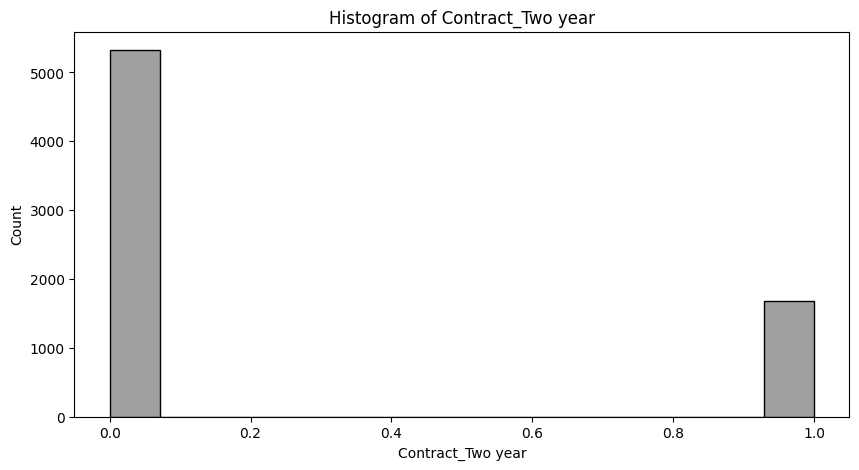

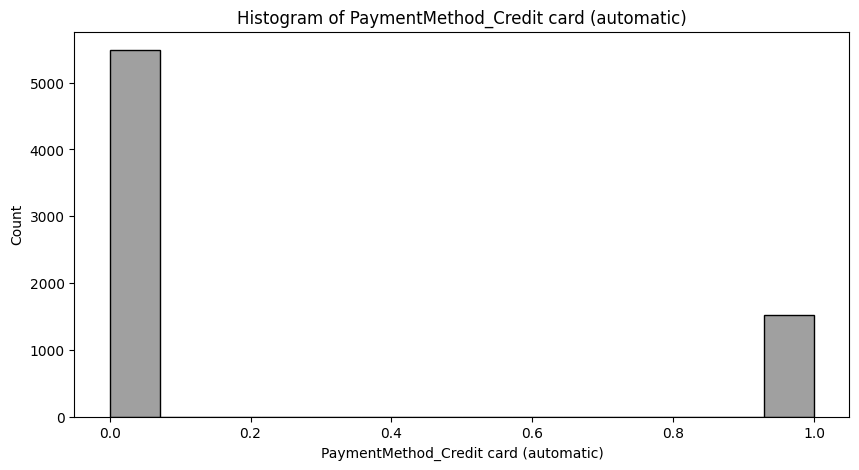

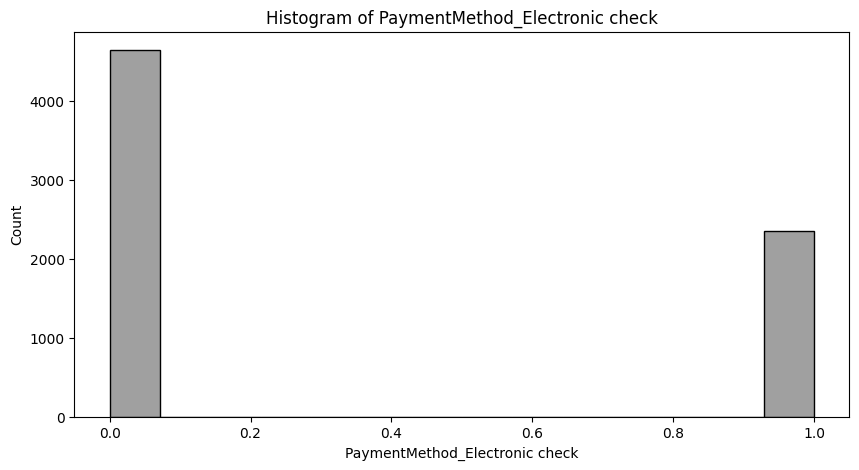

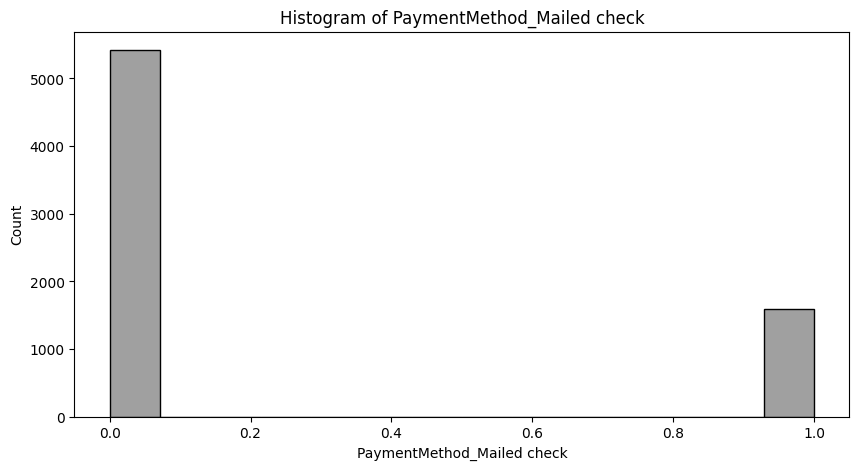

In [667]:
for column in x.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(x[column], color='grey')
    plt.title(f"Histogram of {column}")
    plt.show()

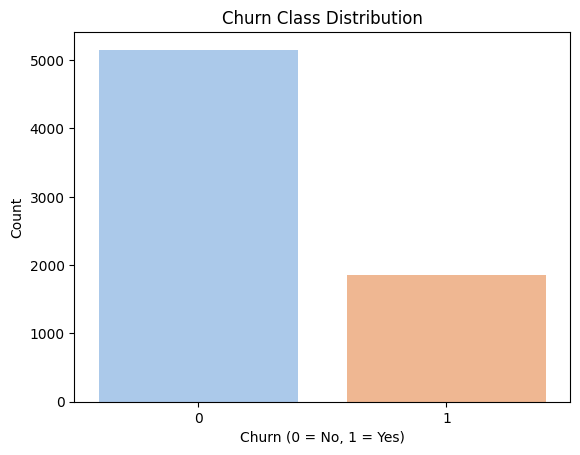

In [668]:
sns.countplot(x=data['Churn'], palette="pastel")
plt.title("Churn Class Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

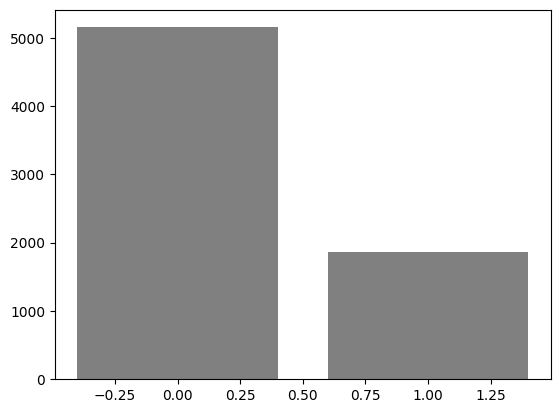

In [669]:
categories, values = np.unique(y, return_counts=True)
plt.bar(categories, values, color='grey')
plt.show()

In [670]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [671]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1328,0,0,1,0,23,1,0,0,0,1,...,0,54.25,1221.55,False,False,False,False,False,True,False
5716,1,0,0,1,2,1,0,0,0,0,...,1,55.30,108.65,False,False,False,False,False,True,False
1906,1,0,0,0,40,0,0,0,1,0,...,0,36.00,1382.90,False,False,True,False,True,False,False
6687,0,1,1,0,2,1,1,0,0,1,...,0,79.20,172.85,True,False,False,False,False,True,False
1880,1,0,0,0,2,1,1,0,0,0,...,1,86.00,165.45,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0,0,0,0,58,1,0,0,0,0,...,1,95.30,5817.70,True,False,False,False,False,True,False
5210,1,0,1,0,53,0,0,0,1,1,...,1,60.45,3184.25,False,False,True,False,False,True,False
5246,0,0,0,0,2,1,0,0,0,0,...,1,79.75,164.50,True,False,False,False,False,True,False
5410,0,0,1,0,64,1,0,1,0,1,...,1,99.00,6375.80,True,False,False,True,False,False,False


In [672]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6882,0,1,0,0,71,1,1,1,1,0,...,1,99.65,7181.25,True,False,True,False,True,False,False
6752,0,0,0,0,12,0,0,1,0,1,...,0,49.85,552.10,False,False,False,True,False,False,True
245,1,1,0,0,4,1,0,1,0,0,...,0,75.35,273.40,True,False,False,False,False,True,False
1889,1,0,0,0,14,0,0,0,1,0,...,1,31.10,419.70,False,False,False,False,False,False,True
6830,1,0,0,0,35,1,0,0,0,0,...,1,20.20,684.40,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732,1,1,0,0,19,1,0,1,0,0,...,1,87.30,1637.30,True,False,False,False,False,True,False
2584,0,0,1,0,58,1,0,1,1,0,...,1,65.25,3791.60,False,False,False,False,True,False,False
3140,1,0,0,0,14,1,0,0,0,1,...,0,76.45,1117.55,True,False,False,False,False,True,False
2697,0,0,1,0,71,1,1,1,1,1,...,0,87.95,6365.35,False,False,False,True,False,False,False


In [673]:
y_train

,Churn
1328,0
5716,0
1906,0
6687,1
1880,1
...,...
3787,0
5210,1
5246,1
5410,0


In [674]:
y_test

,Churn
6882,0
6752,0
245,0
1889,0
6830,0
...,...
5732,0
2584,0
3140,0
2697,0


In [675]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [676]:
numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns

In [677]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [678]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1328,0.0,0.0,1.0,0.0,0.309859,1.0,0.0,0.0,0.0,1.0,...,0.0,0.358209,0.138790,False,False,False,False,False,True,False
5716,1.0,0.0,0.0,1.0,0.014085,1.0,0.0,0.0,0.0,0.0,...,1.0,0.368657,0.010368,False,False,False,False,False,True,False
1906,1.0,0.0,0.0,0.0,0.549296,0.0,0.0,0.0,1.0,0.0,...,0.0,0.176617,0.157408,False,False,True,False,True,False,False
6687,0.0,1.0,1.0,0.0,0.014085,1.0,1.0,0.0,0.0,1.0,...,0.0,0.606468,0.017776,True,False,False,False,False,True,False
1880,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.0,0.0,0.0,...,1.0,0.674129,0.016922,True,False,False,False,False,True,False


In [679]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6882,0.0,1.0,0.0,0.0,0.985915,1.0,1.0,1.0,1.0,0.0,...,1.0,0.809950,0.826500,True,False,True,False,True,False,False
6752,0.0,0.0,0.0,0.0,0.154930,0.0,0.0,1.0,0.0,1.0,...,0.0,0.314428,0.061539,False,False,False,True,False,False,True
245,1.0,1.0,0.0,0.0,0.042254,1.0,0.0,1.0,0.0,0.0,...,0.0,0.568159,0.029379,True,False,False,False,False,True,False
1889,1.0,0.0,0.0,0.0,0.183099,0.0,0.0,0.0,1.0,0.0,...,1.0,0.127861,0.046261,False,False,False,False,False,False,True
6830,1.0,0.0,0.0,0.0,0.478873,1.0,0.0,0.0,0.0,0.0,...,1.0,0.019403,0.076806,False,True,False,True,False,False,True


In [680]:
data.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,2
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2


# **Apply SMOTE to balance the classes in the training data**

In [681]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Modeling**

### **Logistic Regression**

In [682]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [683]:
lgr.score(X_train, y_train)

0.8001069900142653

In [684]:
lgr.score(X_test, y_test)

0.8238231098430813

In [685]:
y_pred = lgr.predict(X_test)

In [686]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1081
           1       0.63      0.57      0.60       321

    accuracy                           0.82      1402
   macro avg       0.75      0.73      0.74      1402
weighted avg       0.82      0.82      0.82      1402



In [687]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8238


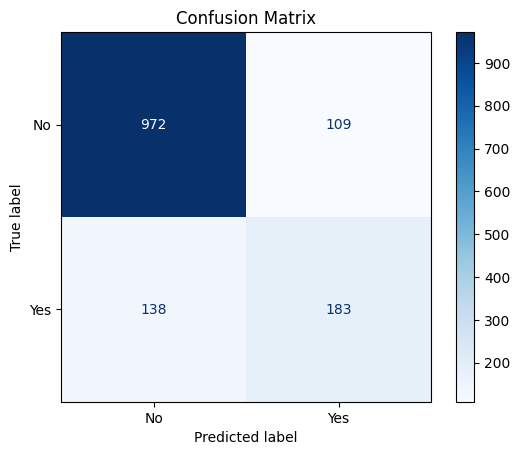

In [688]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **Applying SMOTE on Logistic Regression**

In [689]:
lgr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [690]:
lgr.score(X_train_resampled, y_train_resampled)

0.7766453831041258

In [691]:
y_pred_smote = lgr.predict(X_test)

In [692]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.7517831669044223
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1081
           1       0.47      0.78      0.59       321

    accuracy                           0.75      1402
   macro avg       0.70      0.76      0.71      1402
weighted avg       0.82      0.75      0.77      1402



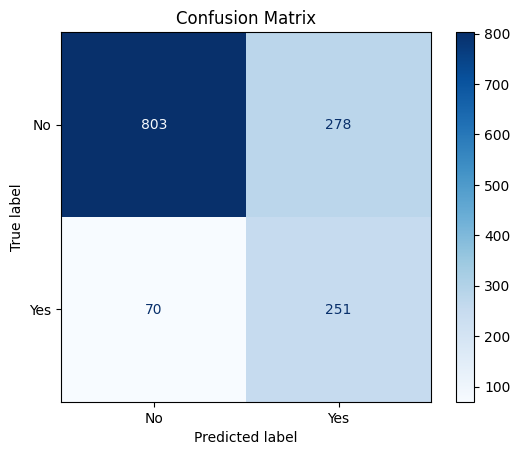

In [693]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **Multinominal**

In [694]:
multi = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
multi.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [695]:
y_pred_multi = multi.predict(X_test)

In [696]:
multi.score(X_train, y_train)

0.8011768901569187

In [697]:
multi.score(X_test, y_test)

0.8238231098430813

In [698]:
print(classification_report(y_test, y_pred_multi))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1081
           1       0.63      0.57      0.60       321

    accuracy                           0.82      1402
   macro avg       0.75      0.74      0.74      1402
weighted avg       0.82      0.82      0.82      1402



In [699]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_multi)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8238


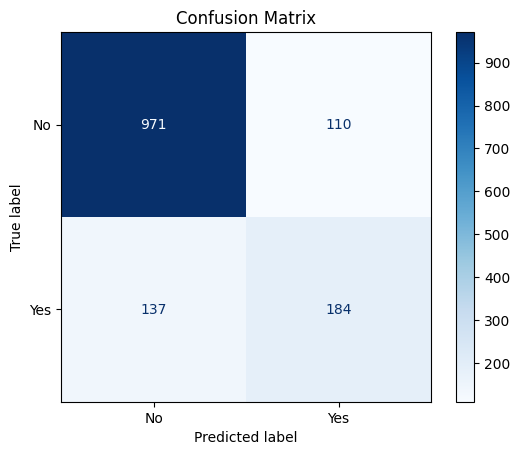

In [700]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_multi)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **Applying SMOTE on Multinominal**

In [701]:
multi.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [702]:
multi.score(X_train_resampled, y_train_resampled)

0.7775049115913556

In [703]:
y_pred_multi_smote = lgr.predict(X_test)

In [704]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_multi_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_multi_smote))

Accuracy: 0.7517831669044223
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1081
           1       0.47      0.78      0.59       321

    accuracy                           0.75      1402
   macro avg       0.70      0.76      0.71      1402
weighted avg       0.82      0.75      0.77      1402



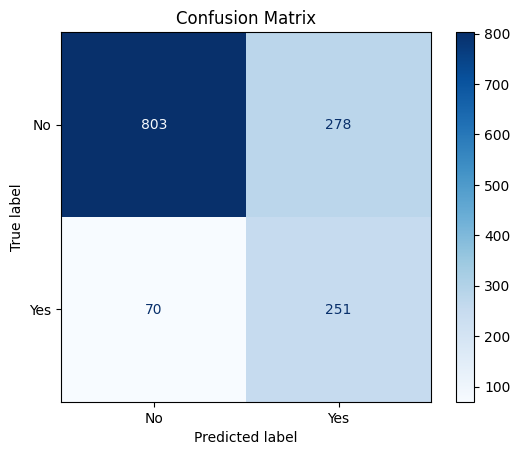

In [705]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_multi_smote)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **SVM**

In [706]:
from sklearn.svm import SVC
svm = SVC(C=0.5, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=0.5)

In [707]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

In [708]:
svm.score(X_train, y_train)

0.80688302425107

In [709]:
svm.score(X_test, y_test)

0.818830242510699

In [710]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1081
           1       0.64      0.48      0.55       321

    accuracy                           0.82      1402
   macro avg       0.75      0.70      0.72      1402
weighted avg       0.81      0.82      0.81      1402



In [711]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8188


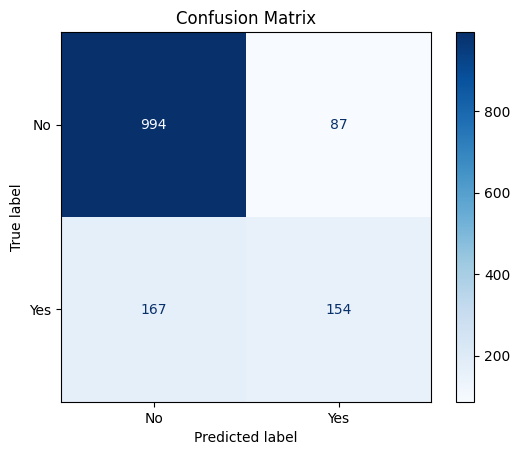

In [712]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **Applying SMOTE on SVM**

In [713]:
svm.fit(X_train_resampled, y_train_resampled)

SVC(C=0.5)

In [714]:
svm.score(X_train_resampled, y_train_resampled)

0.8199901768172888

In [715]:
y_pred_svm = svm.predict(X_test)

In [716]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7653352353780314
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.84      1081
           1       0.49      0.74      0.59       321

    accuracy                           0.77      1402
   macro avg       0.70      0.76      0.71      1402
weighted avg       0.81      0.77      0.78      1402



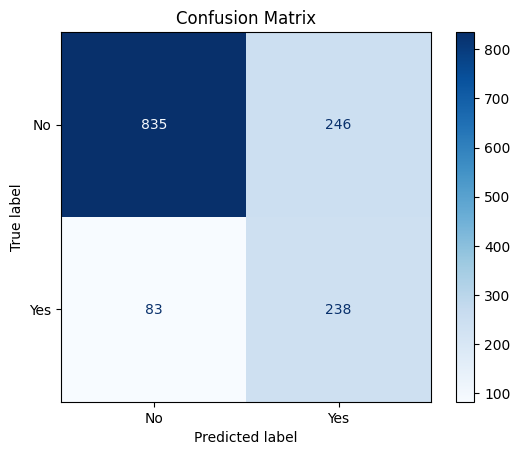

In [717]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **KNN**

In [718]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [719]:
knn.score(X_train, y_train)

0.8111626248216833

In [720]:
knn.score(X_test, y_test)

0.7646219686162625

In [721]:
y_pred_knn = knn.predict(X_test)

In [722]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1081
           1       0.49      0.53      0.51       321

    accuracy                           0.76      1402
   macro avg       0.67      0.68      0.68      1402
weighted avg       0.77      0.76      0.77      1402



In [723]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7646


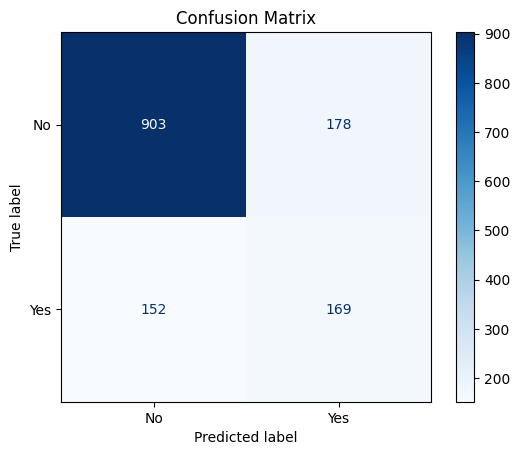

In [724]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### **Applying SMOTE on KNN**

In [725]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=9)

In [726]:
knn.score(X_train_resampled, y_train_resampled)

0.824901768172888

In [727]:
y_pred_knn_smote = knn.predict(X_test)

In [728]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn_smote))

KNN Accuracy: 0.7646219686162625
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      1081
           1       0.41      0.76      0.53       321

    accuracy                           0.69      1402
   macro avg       0.66      0.72      0.65      1402
weighted avg       0.79      0.69      0.72      1402



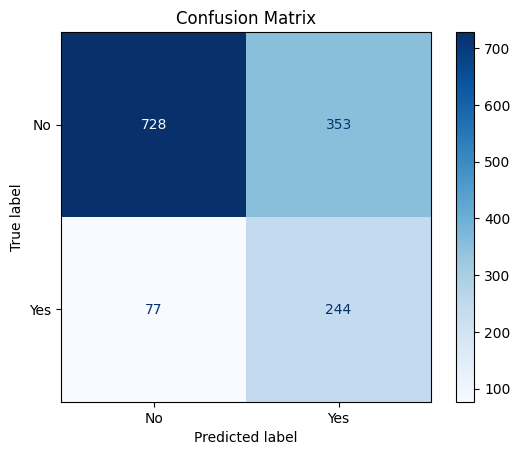

In [729]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn_smote)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()